<a href="https://colab.research.google.com/github/kgeunwo77/dacon_abalone_age/blob/main/%EC%9D%91%EC%9A%A9%EC%88%98%ED%95%99_2022%EB%85%84_1%ED%95%99%EA%B8%B0_2018037018_%EC%95%88%EA%B7%BC%EC%9A%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 불러오기 및 전처리

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [ ]:
#다운받은 csv를 pandas의 dataframe 형식으로 불러옴
train=pd.read_csv('/content/train2.csv',index_col=0)  #Unnamed 열 제거

In [ ]:
train.head()  #데이터 상위 5개를 확인

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
1154,1155,M,0.570,0.480,0.180,0.9395,0.3990,0.2000,0.2950,14
830,831,M,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975,9
1162,1163,F,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050,9
599,600,I,0.310,0.225,0.050,0.1445,0.0675,0.0385,0.0450,6
1058,1059,M,0.310,0.225,0.075,0.1295,0.0455,0.0335,0.0440,9


In [ ]:
train.shape  #데이터 모양 확인

(1127, 10)

변수에 대한 정보 요약 (Feature 설명)

---
Gender: 전복의 성별

Length: 전복의 길이

Diameter: 전복의 지름

Height: 전복의 높이

Whole Weight: 전복의 전체 무게

Shucked Weight: 젖은 상태의 전복 무게

Viscra Weight: 전복의 내장 무게

Shell Weight:전복의 껍데기 무게

Target: 전복의 나이

In [ ]:
train=train.drop(columns=['id'],axis=1)  #id 열 제거

In [ ]:
train.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
1154,M,0.570,0.480,0.180,0.9395,0.3990,0.2000,0.2950,14
830,M,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975,9
1162,F,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050,9
599,I,0.310,0.225,0.050,0.1445,0.0675,0.0385,0.0450,6
1058,M,0.310,0.225,0.075,0.1295,0.0455,0.0335,0.0440,9


In [ ]:
train.dtypes  #전체의 데이터 타입을 확인

Gender             object
Lenght            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscra Weight     float64
Shell Weight      float64
Target              int64
dtype: object

결측치 처리

In [ ]:
train.isnull().sum()  #결측치 확인

Gender            0
Lenght            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscra Weight     0
Shell Weight      0
Target            0
dtype: int64

이상치 제거

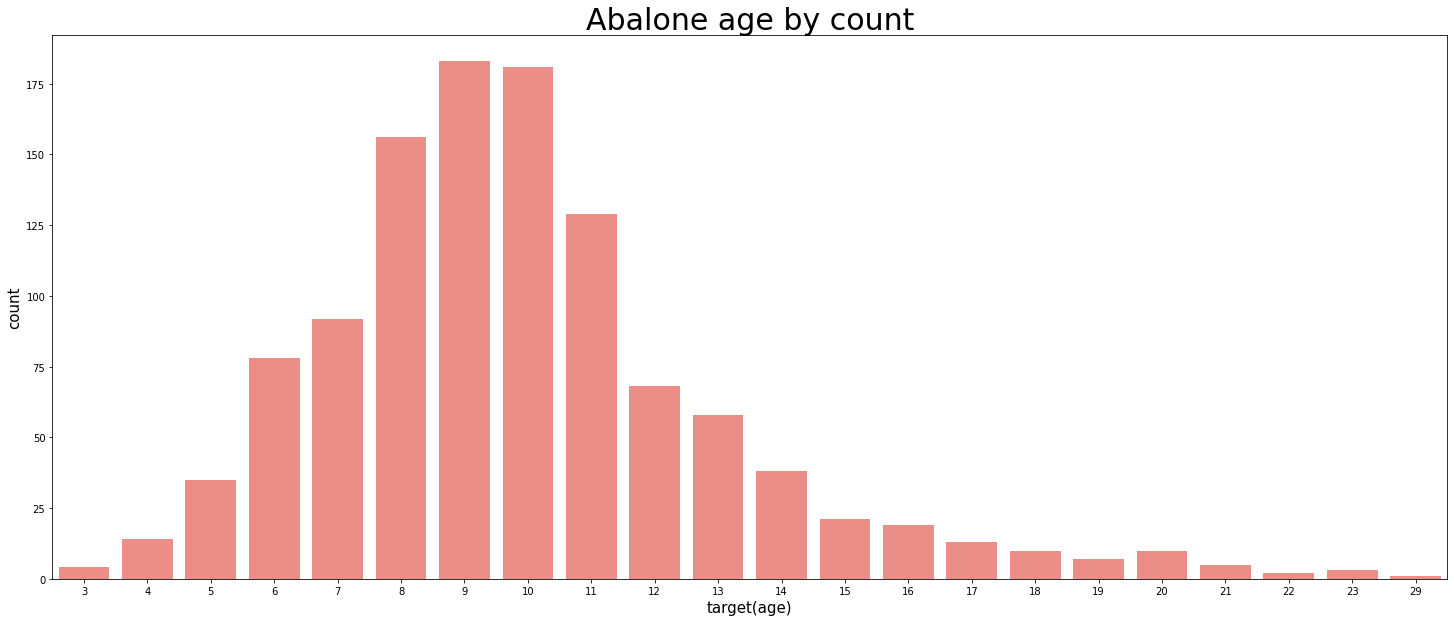

In [ ]:
#Target(전복의 나이) 분포 시각화
plt.rcParams['figure.figsize']=[25,10]
sns.countplot('Target',data=train,color='#FC7F77')
plt.title('Abalone age by count',fontsize=30)
plt.xlabel('target(age)',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.show()

In [ ]:
train[train['Target']>20]  #이상치 확인

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
629,M,0.655,0.540,0.215,1.8440,0.7425,0.3270,0.585,22
216,M,0.675,0.555,0.200,1.4385,0.5450,0.2665,0.465,21
1140,M,0.490,0.390,0.150,0.5730,0.2250,0.1240,0.170,21
762,F,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.475,29
1131,F,0.550,0.415,0.135,0.7750,0.3020,0.1790,0.260,23
735,F,0.640,0.525,0.215,1.7790,0.4535,0.2855,0.550,22
1234,F,0.490,0.385,0.150,0.7865,0.2410,0.1400,0.240,23
1172,F,0.665,0.500,0.175,1.7420,0.5950,0.3025,0.725,21
448,F,0.680,0.550,0.200,1.5960,0.5250,0.4075,0.585,21
792,M,0.735,0.590,0.225,1.7560,0.6370,0.3405,0.580,21


In [ ]:
#혼자서 29의 높은 점수를 가진 열을 이상치라고 판단하여 제거
train=train.drop(index=[762],axis=0)

In [ ]:
#전복의 전체 무게가 전복의 무게+껍질의 무게보다 작은 경우 확인
train[train['Whole Weight']<train['Shucked Weight']+train['Shell Weight']]

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
382,I,0.455,0.330,0.100,0.3720,0.3580,0.0775,0.1100,8
847,I,0.230,0.165,0.060,0.0515,0.0190,0.0145,0.0360,4
1078,I,0.275,0.205,0.070,0.1055,0.4950,0.0190,0.0315,5
435,I,0.475,0.365,0.100,0.1315,0.2025,0.0875,0.1230,7
47,I,0.380,0.275,0.095,0.1375,0.0860,0.0585,0.0605,7


In [ ]:
#전복을 분리했는데 무게가 늘어난 것은 이상하므로 이상치라고 판단하여 제거
train=train.drop(index=[47,382,435,847,1078],axis=0)

In [ ]:
#전복의 무게가 전복의 내장 무게보다 작은 경우 확인
train[train['Shucked Weight']<train['Viscra Weight']]

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
465,M,0.415,0.315,0.125,0.388,0.068,0.09,0.125,12


In [ ]:
#전복에서 내장을 꺼냈는데 내장이 전복보다 무거운 것은 이상하므로 이상치라고 판단하여 제거
train=train.drop(index=[465],axis=0)

Feature 상관관계 분석

In [ ]:
#Gender의 중복되지 않은 값을 출력
print(train['Gender'].unique())

['M' 'F' 'I']


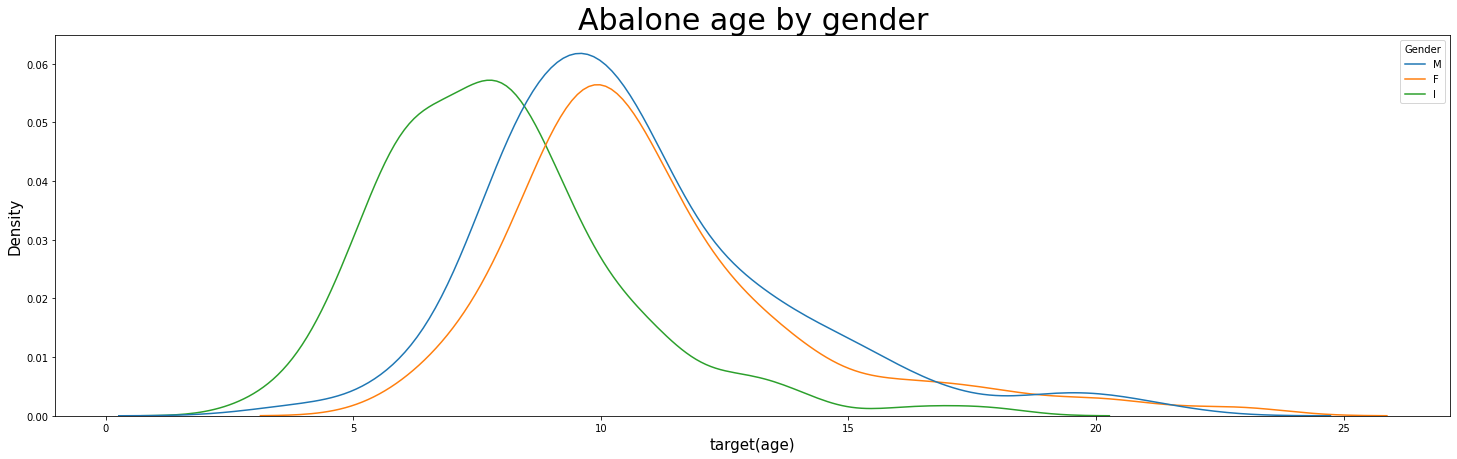

In [ ]:
#성별에 따른 나이 분포 그래프
plt.rcParams['figure.figsize']=[25,7]
sns.kdeplot('Target',hue='Gender',data=train)
plt.title('Abalone age by gender',fontsize=30)
plt.xlabel('target(age)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.show()

In [ ]:
data_description=train.describe()  #변수들에 대한 기초 통계량 확인
data_description

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1120.000000,1120.00000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000
mean,0.523576,0.40758,0.139692,0.834523,0.359416,0.181995,0.240490,9.918750
std,0.120663,0.09995,0.038992,0.500586,0.225281,0.112542,0.142049,3.184469
min,0.110000,0.09000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,0.445000,0.34500,0.115000,0.441500,0.181375,0.093500,0.130000,8.000000
50%,0.540000,0.42000,0.140000,0.781250,0.326500,0.168750,0.231500,10.000000
75%,0.615000,0.48000,0.165000,1.168000,0.505625,0.259000,0.330125,11.000000
max,0.780000,0.63000,0.250000,2.779500,1.488000,0.760000,1.005000,23.000000


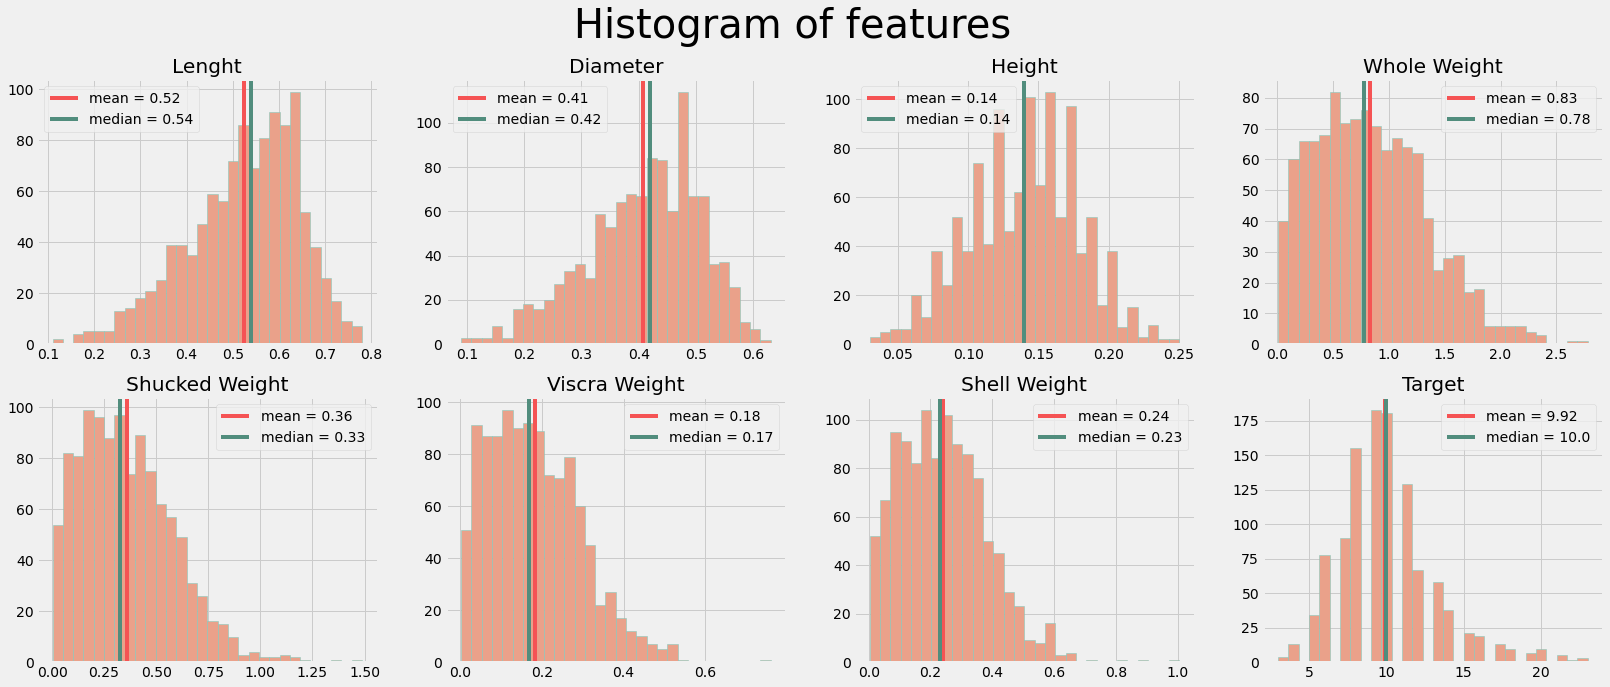

In [ ]:
#수치형 데이터 통계치 그래프
interest_columns=train.columns[1:]
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(2,4,figsize=(25,10))
fig.suptitle('Histogram of features',fontsize=40)
column_idx=0
for i in range(2):
  for j in range(4):
    ax[i][j].hist(train[interest_columns[column_idx]],bins=30,color='#eaa18a',edgecolor='#7bcabf')
    ax[i][j].set_title(interest_columns[column_idx])
    ax[i][j].axvline(data_description[interest_columns[column_idx]]['mean'],c='#f55354',label=f"mean = {round(data_description[interest_columns[column_idx]]['mean'], 2)}")
    ax[i][j].axvline(data_description[interest_columns[column_idx]]['50%'], c='#518d7d', label = f"median = {round(data_description[interest_columns[column_idx]]['50%'], 2)}")
    ax[i][j].legend()
    column_idx+=1

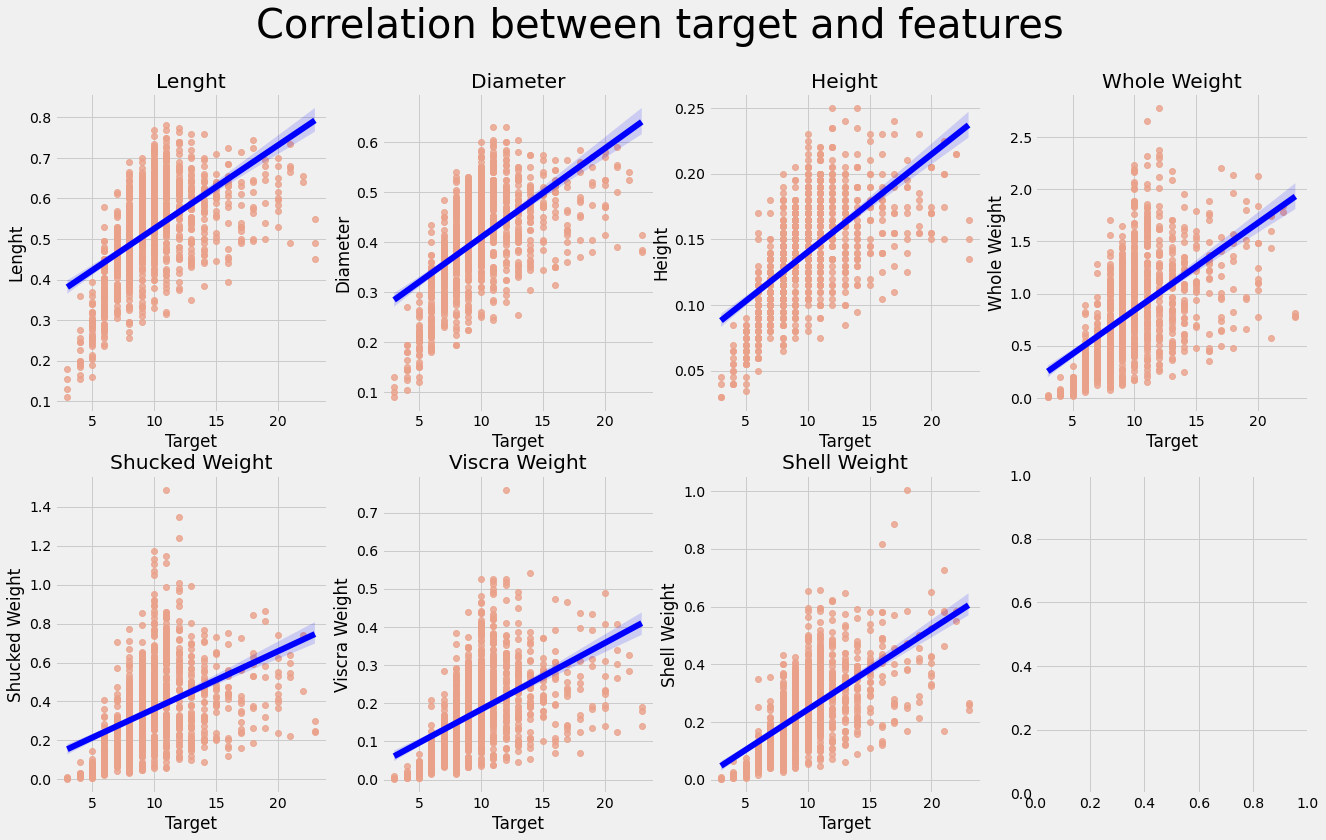

In [ ]:
#수치형 데이터 분포 Target과 상관관계 그래프
def visualize(axx,yfield):
  sns.regplot(x='Target',y=yfield,data=train,color='#eaa18a',line_kws={'color':'#0000ff'},ax=axx)
  axx.set_title(yfield)

figure, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(nrows=2, ncols=4)
figure.set_size_inches(20,12)
figure.suptitle('Correlation between target and features', fontsize=40)
for i in range(len(train.columns[1:-1])):
  visualize(eval(f'ax{i+1}'), train.columns[i+1])

In [ ]:
#수치형 데이터 상관관계 히트맵 시각화
cols=['Target','Lenght','Diameter','Height','Whole Weight','Shucked Weight','Viscra Weight','Shell Weight']
corr=train[cols].corr(method='pearson')
corr

,Target,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
Target,1.000000,0.542835,0.567138,0.607482,0.533345,0.417966,0.493279,0.624272
Lenght,0.542835,1.000000,0.987230,0.904696,0.926206,0.898226,0.902297,0.897203
Diameter,0.567138,0.987230,1.000000,0.912063,0.927971,0.894020,0.900826,0.906656
Height,0.607482,0.904696,0.912063,1.000000,0.897012,0.842970,0.867065,0.901883
Whole Weight,0.533345,0.926206,0.927971,0.897012,1.000000,0.970324,0.966136,0.952114
Shucked Weight,0.417966,0.898226,0.894020,0.842970,0.970324,1.000000,0.933497,0.873926
Viscra Weight,0.493279,0.902297,0.900826,0.867065,0.966136,0.933497,1.000000,0.902414
Shell Weight,0.624272,0.897203,0.906656,0.901883,0.952114,0.873926,0.902414,1.000000


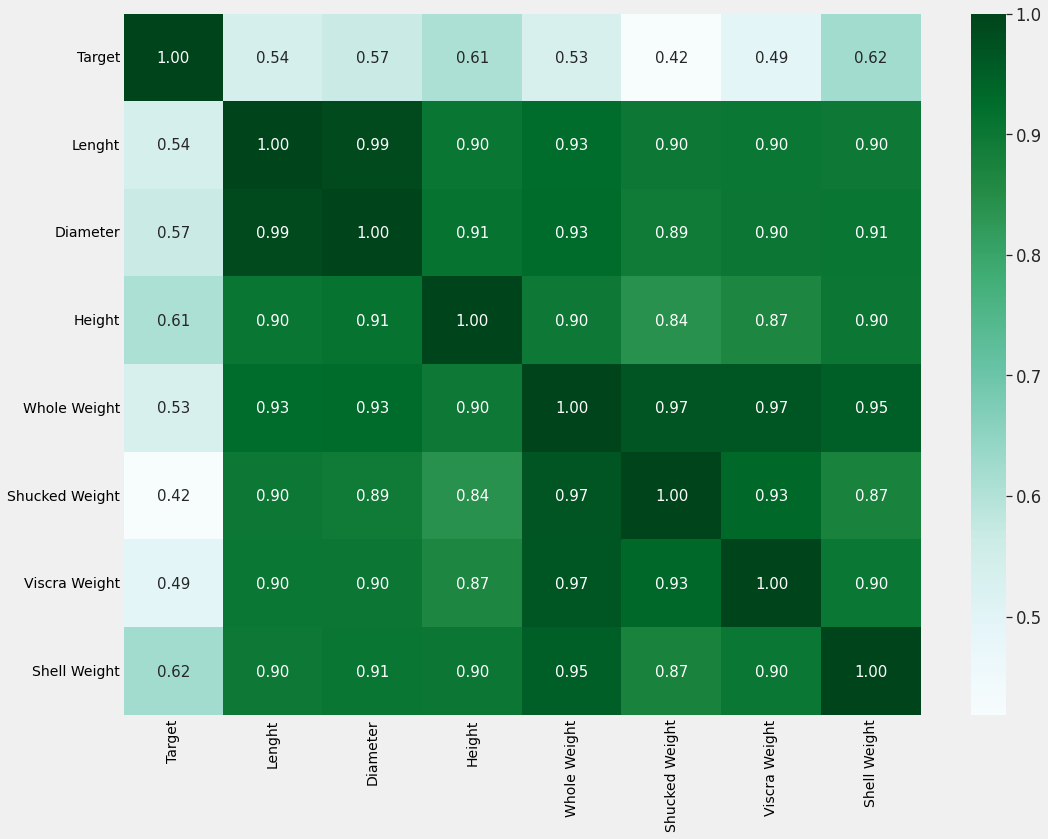

In [ ]:
fig=plt.figure(figsize=(16,12))
ax=fig.gca()

sns.set(font_scale=1.5)
heatmap=sns.heatmap(corr.values,annot=True,fmt='.2f',annot_kws={'size':15},
                    yticklabels=cols,xticklabels=cols,ax=ax,cmap='BuGn')
plt.tight_layout()
plt.show()

In [ ]:
s28=corr.unstack()
df_temp28=pd.DataFrame(s28['Target'].sort_values(ascending=False),columns=['Target'])
df_temp28.style.background_gradient(cmap='YlGnBu')

,Target
Target,1.000000
Shell Weight,0.624272
Height,0.607482
Diameter,0.567138
Lenght,0.542835
Whole Weight,0.533345
Viscra Weight,0.493279
Shucked Weight,0.417966


Feature 처리 과정

In [ ]:
#카테고리형 데이터인 Gender 변수 변환 - one hot encoding
train=pd.get_dummies(train)
train.head()

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target,Gender_F,Gender_I,Gender_M
1154,0.570,0.480,0.180,0.9395,0.3990,0.2000,0.2950,14,0,0,1
830,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975,9,0,0,1
1162,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050,9,1,0,0
599,0.310,0.225,0.050,0.1445,0.0675,0.0385,0.0450,6,0,1,0
1058,0.310,0.225,0.075,0.1295,0.0455,0.0335,0.0440,9,0,0,1


In [ ]:
test=pd.read_csv('/content/test2.csv',index_col=0)
test=test.drop(['id'],axis=1)
test=pd.get_dummies(test)
test.head()

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target,Gender_F,Gender_I,Gender_M
1213,0.435,0.350,0.125,0.4590,0.1970,0.1145,0.145,9,1,0,0
537,0.525,0.395,0.165,0.7820,0.2850,0.1405,0.285,19,0,0,1
1216,0.465,0.360,0.080,0.4880,0.1910,0.1250,0.155,11,0,0,1
692,0.380,0.300,0.090,0.2770,0.1655,0.0625,0.082,6,0,1,0
575,0.510,0.390,0.125,0.6565,0.2620,0.1835,0.175,10,0,0,1


데이터 분할

In [ ]:
X=train.drop(['Target'],axis=1)  #입력값: 전복의 Feature
y=train['Target']                #출력값: 전복의 나이(Target)

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

#학습 데이터와 검증 데이터로 분할
train_X,valid_X,train_y,valid_y=train_test_split(X,y,test_size=0.2,random_state=41)

측정 기준

In [ ]:
def NMAE(true,pred):
  mae=np.mean(np.abs(true-pred))
  score=mae/np.mean(np.abs(true))
  return score

모델 학습

In [ ]:
###### 여기부터 학습 ######
#두 모델 선언과 학습 (앙상블)
'''
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

models=[]

models.append(LinearRegression())
models.append(GradientBoostingRegressor(learning_rate=0.06,criterion='mae',random_state=127))

for model in models:
  model.fit(train_X,train_y)
'''

"\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.ensemble import GradientBoostingRegressor\n\nmodels=[]\n\nmodels.append(LinearRegression())\nmodels.append(GradientBoostingRegressor(learning_rate=0.06,criterion='mae',random_state=127))\n\nfor model in models:\n  model.fit(train_X,train_y)\n"

In [ ]:
'''
with open('2018037018_안근우.model','wb') as fw:
  pickle.dump(models,fw)
'''

"\nwith open('2018037018_안근우.model','wb') as fw:\n  pickle.dump(models,fw)\n"

모델 검증

In [ ]:
#최종 결과 선택 방식: Soft Voting
'''
prediction=None

for model in models:
  if prediction is None:
    prediction=model.predict(valid_X)
  else:
    prediction+=model.predict(valid_X)

prediction/=len(models)
'''

'\nprediction=None\n\nfor model in models:\n  if prediction is None:\n    prediction=model.predict(valid_X)\n  else:\n    prediction+=model.predict(valid_X)\n\nprediction/=len(models)\n'

In [ ]:
#prediction

In [ ]:
#NMAE 확인
#print(NMAE(valid_y,prediction))

In [ ]:
#측정 결과 시각화 (지표가 아닌 단순 오차율)
'''
result=pd.DataFrame({'Target_original':valid_y,
                     'Target_prediction':prediction,
                     'Error Rate(%)':np.abs(valid_y-prediction)/valid_y*100})
result
'''

"\nresult=pd.DataFrame({'Target_original':valid_y,\n                     'Target_prediction':prediction,\n                     'Error Rate(%)':np.abs(valid_y-prediction)/valid_y*100})\nresult\n"

모델 테스트

In [ ]:
from google.colab import files
upload_files=files.upload()

Saving 2018037018_안근우.model to 2018037018_안근우.model


In [ ]:
with open('2018037018_안근우.model','rb') as f:
  models=pickle.load(f)

In [ ]:
test_X=test.drop(['Target'],axis=1)

In [ ]:
###### 여기부터 테스트 ######
#최종 결과 선택 방식: Soft Voting
prediction=None

for model in models:
  if prediction is None:
    prediction=model.predict(test_X)
  else:
    prediction+=model.predict(test_X)

prediction/=len(models)

In [ ]:
prediction

array([ 9.13420496, 11.46704516,  9.10315646,  6.80462193,  9.32902162,
        7.61521764,  8.64580211, 12.61751743, 11.37509769,  9.1572913 ,
        6.89881929, 11.06236329,  8.26581707, 11.96153476, 11.5745277 ,
        9.21494561,  9.13255115,  7.00195286, 10.32800604,  8.17084701,
        9.86717814,  8.00931775, 12.1227463 , 11.83124088, 15.22673902,
        7.67269066,  7.14025975, 10.05455131,  9.00970731,  9.1643338 ,
       13.41503022, 10.22142697, 11.02805042,  8.1470021 ,  7.22132596,
        6.91951956, 10.1259595 ,  7.75750563, 10.45848549,  8.80828578,
        8.98864392,  8.46158495,  6.44560305, 10.11448901,  9.90166335,
        7.34605028,  8.90807131,  9.8492759 ,  9.89799843,  7.91213297,
        8.92684784,  6.79483475, 10.89552109, 10.6949358 ,  8.29678342,
       13.54359333, 11.34166636,  5.63106367,  9.03664261, 16.43089223,
        8.85573911, 16.91728782, 12.67944506,  9.01351785,  6.38456884,
       11.87901683, 10.81735216, 10.13240086,  9.94711398,  9.41

In [ ]:
#NMAE 확인
print(NMAE(test['Target'],prediction))

0.14505433056628123


In [ ]:
#측정 결과 시각화 (지표가 아닌 단순 오차율)
result=pd.DataFrame({'Target_original':test['Target'],
                     'Target_prediction':prediction,
                     'Error Rate(%)':np.abs(test['Target']-prediction)/test['Target']*100})
result

,Target_original,Target_prediction,Error Rate(%)
1213,9,9.134205,1.491166
537,19,11.467045,39.647131
1216,11,9.103156,17.244032
692,6,6.804622,13.410366
575,10,9.329022,6.709784
...,...,...,...
321,11,11.088366,0.803325
622,9,9.348128,3.868085
340,11,12.840608,16.732800
819,7,8.888698,26.981404
